# 데이터 결합 테스트 AS-IS 구현 내용

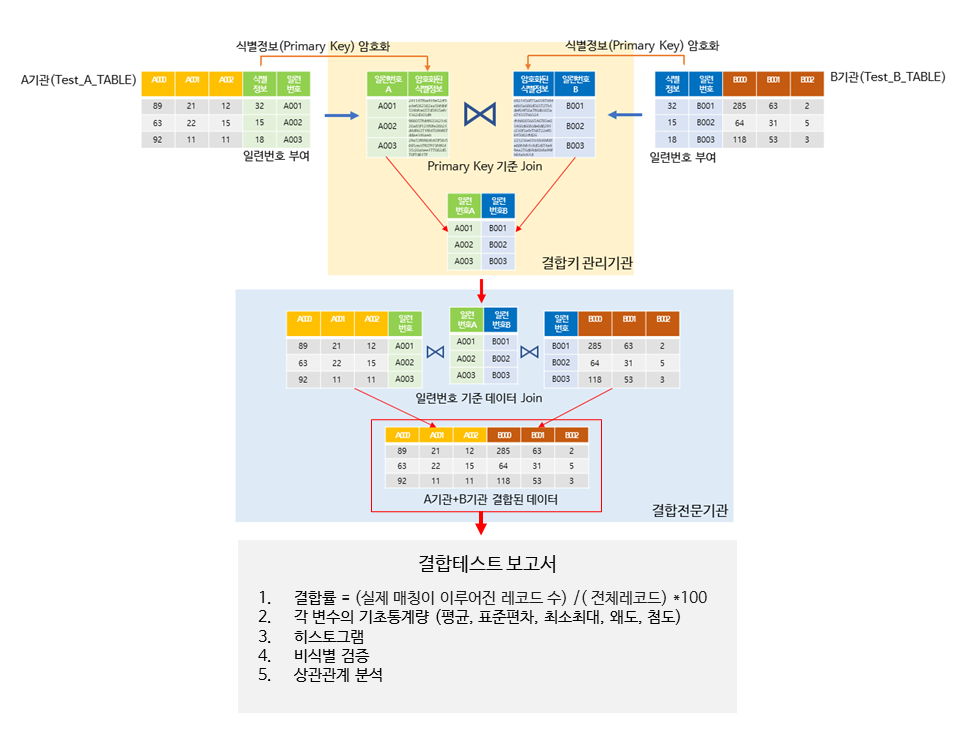

## 데이터 결합

In [1]:
import pandas as pd
import hashlib

In [2]:
#주요 상수값
salt = "MOHW20200925"
DELIMITER = ','
N = 7000000
MATCH = 0.328489271621  

#### 두 기관의 데이터를 불러옵니다.

In [3]:
A_dataset = pd.read_csv("khis_A_ALL.csv", encoding="cp949")
A_dataset.set_index(' index')

,결합필드,A001,A002,A003,A004,A005,A007
index,,,,,,,
A0000000000,32,285,63,2,89,21,12
A0000000001,15,64,31,5,63,22,15
A0000000002,18,118,53,3,92,11,11
A0000000003,40,31,61,1,42,19,12
A0000000004,11,89,5,10,56,27,15
A0000000005,12,55,5,6,97,28,13
A0000000006,2,120,48,2,78,21,15
A0000000007,22,131,21,9,56,22,18
A0000000008,41,164,64,3,43,30,17


In [4]:
B_dataset = pd.read_csv("khis_B_ALL.csv", encoding="cp949")
B_dataset.set_index(' index')

,결합필드,B001,B002,B003,B004,B005,B006
index,,,,,,,
B0000000000,91,132,58,2,39,37,37
B0000000001,58,288,57,3,21,21,44
B0000000002,75,111,53,8,15,41,38
B0000000003,35,203,12,2,146,41,82
B0000000004,28,8,17,8,166,62,66
...,...,...,...,...,...,...,...
B0000000065,71,137,65,2,25,11,37
B0000000066,36,3,13,1,136,42,59
B0000000067,72,222,64,5,27,16,36


#### 데이터 내의 Field 값을 기반으로 sha256으로 암호화 후 저장.
sha256 + salt 방식으로 암호화함

In [5]:
A_dataset['key'] = B_dataset[' 결합필드'].apply(lambda x : hashlib.sha256(salt.encode() + x.to_bytes(4, byteorder="little")).hexdigest())

#테스트용 ALL data 저장 (테스트용)
A_dataset.to_csv("./ALL/A_dataset_ALL.csv") 

#결합키 + 일련번호 -> 결합키전문기관
#A_dataset[['key','num']].to_csv("./ALL/A_dataset_key.csv") 

#PHI인 Field제외하고 저장 -> 결합전문기관으로 
A_dataset[A_dataset.columns.difference([' 결합필드','key'])].to_csv("./ALL/A_dataset_table.csv", index=False) 

In [6]:
B_dataset['key'] = B_dataset[' 결합필드'].apply(lambda x : hashlib.sha256(salt.encode() + x.to_bytes(4, byteorder="little")).hexdigest())

#테스트용 ALL data 저장 (테스트용)
B_dataset.to_csv("./ALL/B_dataset_ALL.csv")

#결합키 + 일련번호 -> 결합키전문기관
#B_dataset[['key','num']].to_csv("./ALL/B_dataset_key.csv") 

#PHI인 Field제외하고 저장
B_dataset[B_dataset.columns.difference([' 결합필드','key'])].to_csv("./ALL/B_dataset_table.csv", index=False)

In [7]:
#결합키 관리기관 -> 결합 키를 기반으로 index 값을 가져옴.
key_idx = pd.merge(A_dataset[['key',' index']], B_dataset[['key',' index']], left_on='key', right_on='key', how='left')

key_idx[key_idx.columns.difference(['key'])].to_csv("./ALL/index.csv", index=False)


#### HASH키 기반으로 두 데이터 결합하기

In [8]:
#데이터 가져오기
index = pd.read_csv("./ALL/index.csv")

A_dataset_table = pd.read_csv("./ALL/A_dataset_table.csv")
B_dataset_table = pd.read_csv("./ALL/B_dataset_table.csv")

In [9]:
index.head() #결합전문기관에서 수신하는 데이터

,index_x,index_y
0,A0000000000,B0000000000
1,A0000000001,B0000000001
2,A0000000002,B0000000002
3,A0000000003,B0000000003
4,A0000000004,B0000000004


### 데이터 결합 함수

In [10]:
#a_key는 dfA의 결합키로 index_a와 결합되는 형식
def join(dfA, dfB, index, a_key, b_key, index_a, index_b): 
    joinA = pd.merge(left = dfA, right = index, left_on = a_key, right_on = index_a, how = "right")
    joinA.drop([a_key, index_a], axis = 1, inplace = True)
    join = pd.merge(joinA, dfB, left_on = index_b, right_on = b_key, how = "left")
    join.drop([b_key, index_b], axis = 1, inplace = True)
    return join

In [11]:
dfC = join(A_dataset_table, B_dataset_table, index, " index", " index", " index_x", " index_y")

#### 결합된 데이터 확인

In [12]:
dfC.head()

,A001,A002,A003,A004,A005,A007,B001,B002,B003,B004,B005,B006
0,285,63,2,89,21,12,132,58,2,39,37,37
1,64,31,5,63,22,15,288,57,3,21,21,44
2,118,53,3,92,11,11,111,53,8,15,41,38
3,31,61,1,42,19,12,203,12,2,146,41,82
4,89,5,10,56,27,15,8,17,8,166,62,66


# 결합테스트

## 결합률

In [13]:
#결합률 return
def comgLen(dfA, dfB, index):
    orginA = len(dfA)
    orginB = len(dfB)
    comb = len(index)
    percent = ( (comb / orginA) + (comb / orginB) ) / 2
    return percent

In [14]:
comgLen(A_dataset_table, B_dataset_table, index)

0.85

## 기술통계

In [15]:
#수치형 자료의 기술 통계만 추출
def static_num(df):
    static = pd.DataFrame(columns = ["기초통계", "평균", "표준편차", "최소", "최대", "왜도", "첨도"])
    #변수의 값들이 숫자인 것들만 뽑아냄
    cols = df.select_dtypes(include="number").columns
    #통계 추출
    static["기초통계"] = cols
    for col in static["기초통계"]:
        static["평균"][static["기초통계"] == col] = df[col].mean()
        static["표준편차"][static["기초통계"] == col] = df[col].std()
        static["최소"][static["기초통계"] == col] = df[col].min()
        static["최대"][static["기초통계"] == col] = df[col].max()
        static["왜도"][static["기초통계"] == col] = df[col].skew()
        static["첨도"][static["기초통계"] == col] = df[col].kurtosis()
    return static

In [16]:
 static_num(dfC)

,기초통계,평균,표준편차,최소,최대,왜도,첨도
0,A001,131.286,83.8761,4,285,0.17572,-0.929832
1,A002,34.4898,21.0408,1,73,0.0947123,-1.18187
2,A003,5.30612,2.9875,1,10,0.0180496,-1.41628
3,A004,63.9388,19.4876,32,99,0.159969,-1.19523
4,A005,20.1837,6.46682,10,30,-0.0312733,-1.33004
5,A007,14.8571,3.12916,10,20,0.0060761,-1.38317
6,B001,163.163,82.0387,8,293,-0.360319,-0.957139
7,B002,39.898,22.8822,3,78,0.248984,-1.29019
8,B003,5.26531,2.95646,1,10,0.269094,-1.16809
9,B004,47.1429,41.6963,11,166,1.69386,1.87703


## 그래프

In [17]:
import matplotlib.pyplot as plt

In [18]:
#확인할 변수명 을 col에 "A011"같이 입력
def one_histogram(df, col): 
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel("count")
    plt.title(col + "'s histogram")

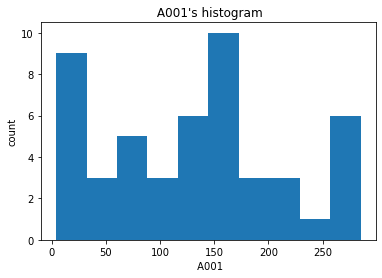

In [19]:
one_histogram(dfC, " A001")

## 비식별검증(K익명성)

In [20]:
import numpy as np
import seaborn as sns

In [21]:
def kAn(dfC, identity) : #id는 "A0" 등 입력
    idList = []
    for i in dfC[identity]:
        if i not in idList:
            idList.append(i)
    idCount = np.zeros(len(idList))
    for i in range(len(idList)):
        idCount[i] = len(dfC[dfC[identity] == idList[i]])
    plt.hist(idCount)
    plt.xticks(np.arange(max(idCount)))
    plt.xlabel("K")
    plt.ylabel("count")
    plt.title(identity + "'s K-Anonymity")
    return idCount.min()

B003의 K의 min값 :  2.0


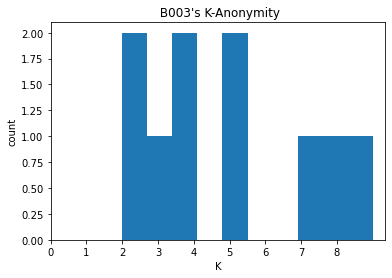

In [22]:
print("B003의 K의 min값 : ", kAn(dfC, " B003"))

## 상관관계

In [23]:
from scipy import stats

In [24]:
#두 변수의 공분산, p-value, 상관계수 구함
def cor(df, value1, value2):
    temp = []
    chis = stats.pearsonr(df[value1], df[value2]) #참고 : https://ordo.tistory.com/100
    cov = np.cov(df[value1], df[value2])[0,1] #참고 : https://mindscale.kr/course/basic-stat-python/5/
    temp.append(chis[0]) #temp[0]
    temp.append(chis[1]) #temp[1]
    temp.append(cov)     #temp[2]
    return temp # chis[0]은 상관계수 값, chis[1]은 p-value 값, cov는 공분산 값

In [25]:
cor(dfC, ' A001', ' B001')

[-0.17099182370682248, 0.2401071411042945, -1176.6101190476188]

# TO-BE

### L-다양성

In [26]:
def lDiv(dfC, identity, sensitive):
    #k 익명화 정도 확인
    idList = []
    for i in dfC[identity]:
        if i not in idList:
            idList.append(i)
    idCount = np.zeros(len(idList))
    for i in range(len(idList)):
        idCount[i] = len(dfC[dfC[identity] == idList[i]])
    
    #ㅣ 다양성 정도 확인
    L_list = []
    L_count = np.zeros(len(idList))
    for i in range(len(idList)):
        L_list.append([])
        for j in dfC[sensitive][dfC[identity] == idList[i]]:
            if j not in L_list[i]:
                L_list[i].append(j)
        L_count[i] = len(L_list[i])
    
    #L-다양성 시각화 
    plt.hist(L_count)
    plt.xticks(np.arange(max(L_count)))
    plt.xlabel("L")
    plt.ylabel("count")
    plt.title(identity + "'s  L-Diversity")
    
    return L_count.min()

L 다양성 최솟값 : 2.0


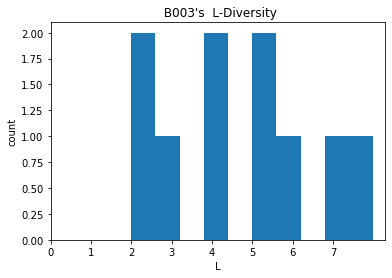

In [104]:
print("L 다양성 최솟값 : {0}".format(lDiv(dfC, " B003", " B004")))

### T-근접성 

In [30]:
for i in dfC[" B004"]:
    if i not in temp:
        temp.append(i)

In [32]:
temp.sort()

#### t-근접성 확인을 위한 딕셔너리 생성

In [41]:
t_dic = dict()

In [51]:
for i in temp:
    test = int(i / 10)
    if test == 1:
        t_dic[i] = 'A'
    elif test == 2:
        t_dic[i] = 'B'
    elif test == 3:
        t_dic[i] = 'C'
    elif test == 6:
        t_dic[i] = 'D'
    elif test == 7:
        t_dic[i] = 'E'
    elif test == 9:
        t_dic[i] = 'F'
    elif test == 10:
        t_dic[i] = 'G'
    elif test == 12:
        t_dic[i] = 'H'
    elif test == 14:
        t_dic[i] = 'I'
    elif test == 16:
        t_dic[i] = 'J'

#### t 근접성 함수

In [105]:
def tClo (dfC, identity, sensitive, dic):
    #k 익명화 정도 확인
    idList = []
    for i in dfC[identity]:
        if i not in idList:
            idList.append(i)
    idCount = np.zeros(len(idList))
    for i in range(len(idList)):
        idCount[i] = len(dfC[dfC[identity] == idList[i]])
    
    #ㅣ 다양성 정도 확인
    L_list = []
    L_count = np.zeros(len(idList))
    for i in range(len(idList)):
        L_list.append([])
        for j in dfC[sensitive][dfC[identity] == idList[i]]:
            if j not in L_list[i]:
                L_list[i].append(j)
        L_count[i] = len(L_list[i])
    
    #t 근접성 확인
    T_list = {}
    T_count = []
    for i in range(len(L_list)): ##사전에 있는 유사 정보를 하나로 통일 시켜줌
        for j in range(len(L_list[i])):
            L_list[i][j] = dic[L_list[i][j]]
            # 중복 요소 counting
            try: T_list[L_list[i][j]] += 1
            except:T_list[L_list[i][j]] = 1 
        T_count.append(max(list(T_list.values())))
        T_list = {}
    
    #t 근접성 시각화 
    plt.hist(T_count)
    plt.xticks(np.arange(max(T_count)))
    plt.xlabel("T")
    plt.ylabel("count")
    plt.title(identity + "'s  T-Diversity")
    
    return max(T_count)

T 근접성 최댓값 :  3


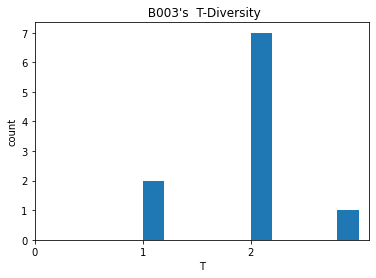

In [107]:
print("T 근접성 최댓값 : ", tClo (dfC, " B003", " B004", t_dic))